# imports

In [1]:
#imports
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import joblib
import pandas_ta as ta
from prophet import Prophet

In [2]:
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred) 
  return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

# variables

In [3]:
#Reading Data
df = pd.read_csv("C:\\Users\AmirHussain\Desktop\machine-Learning-tradert-bot-main\Datas\XAUUSDM15.csv" , 
                   encoding = 'utf-16', 
                   names =  ['ds', 'Open', 'High', 'Low', 'Close', 'Volume', '0'] )

df.drop(['0', 'Volume'], inplace= True, axis= 1)
df['ds'] = pd.to_datetime(df['ds'])



In [4]:
df.set_index('ds', drop=True, inplace = True)

In [5]:
def pivot_point( df) :
  pivot_points = []

  for _, row in df.iterrows():
      high = row['High']
      low = row['Low']
      close = row['Close']

      pivot_point = (high + low + close) / 3

      pivot_points.append(round(pivot_point, 2))

  return pivot_points

In [6]:
df['ma 1'] = ta.ma('sma', df['Open'], length = 5)
df['ma 2'] = ta.ma('sma', df['Open'], length = 10)
df['Pivot'] = pivot_point(df)
df['target'] = df['Open'].shift(1)

In [7]:
df.head()

,Open,High,Low,Close,ma 1,ma 2,Pivot,target
ds,,,,,,,,
2019-02-18 17:15:00,1325.95,1326.57,1325.83,1325.89,NaN,NaN,1326.10,NaN
2019-02-18 17:30:00,1325.93,1326.51,1325.87,1326.12,NaN,NaN,1326.17,1325.95
2019-02-18 17:45:00,1326.11,1326.38,1325.67,1325.90,NaN,NaN,1325.98,1325.93
2019-02-18 18:00:00,1325.86,1326.17,1325.47,1326.09,NaN,NaN,1325.91,1326.11
2019-02-18 18:15:00,1326.10,1326.48,1326.10,1326.38,1325.99,NaN,1326.32,1325.86


In [8]:
data = df[[ "Open" ,"Pivot","ma 1", 'ma 2', "target" ]]
data.head()

,Open,Pivot,ma 1,ma 2,target
ds,,,,,
2019-02-18 17:15:00,1325.95,1326.10,NaN,NaN,NaN
2019-02-18 17:30:00,1325.93,1326.17,NaN,NaN,1325.95
2019-02-18 17:45:00,1326.11,1325.98,NaN,NaN,1325.93
2019-02-18 18:00:00,1325.86,1325.91,NaN,NaN,1326.11
2019-02-18 18:15:00,1326.10,1326.32,1325.99,NaN,1325.86


In [9]:
data = data.reset_index().rename(columns={'Open' : "y"})

In [10]:
data.dropna(inplace=True)

# split Data

In [11]:
X = data[ :70000 ] 
Y = data[ 70000:  ]

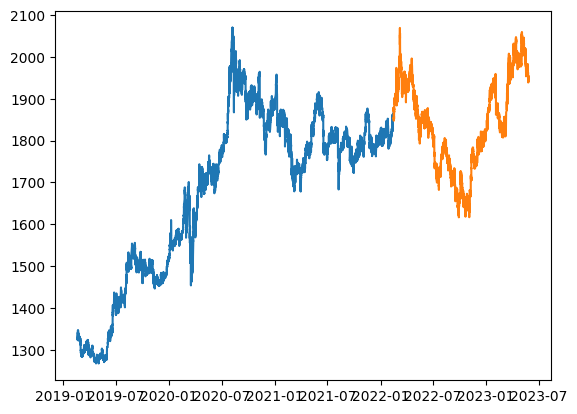

In [12]:
import matplotlib.pyplot as plt
plt.plot(X['ds'] ,X['y'], label = "y train")
plt.plot(Y['ds'] ,Y['y'], label = 'y test')
plt.show()

In [31]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input



nn_model = Sequential()
# nn_model.add(LSTM(20, input_shape=(10, 1)))
nn_model.add(Dense(259
                   , activation='linear'))
# nn_model.add(Dense(128, activation='linear'))
nn_model.add(Dense(1, activation='linear'))

# Compile the model with weighted loss
nn_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [32]:
# Train the model with class weights
nn_model.fit(X['y'], X['target'], epochs=2, batch_size=32,  validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = nn_model.evaluate(Y['y'], Y['target'])
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/2


1750/1750 [==============================] - 4s 2ms/step - loss: 14320.0596 - accuracy: 0.0000e+00 - val_loss: 2.7208 - val_accuracy: 0.0000e+00
Epoch 2/2
939/939 [==============================] - 1s 1ms/step - loss: 3.5232 - accuracy: 0.0000e+00
Loss: 3.5232350826263428
Accuracy: 0.0


In [33]:
pred = nn_model.predict(Y['y'])
pred[:,0]

939/939 [==============================] - 1s 1ms/step


array([1872.4935, 1871.4238, 1872.6635, ..., 1944.6328, 1945.1525,
       1945.9119], dtype=float32)

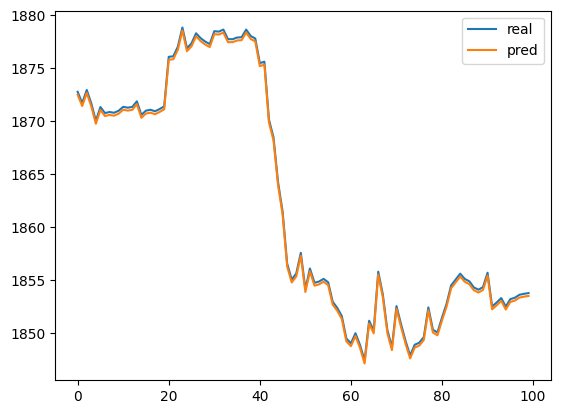

In [34]:
plt.plot(Y['y'].to_numpy()[:100] , label = 'real' )
plt.plot(pred[:,0]        [:100] , label = 'pred' )

plt.legend()
plt.show()

In [36]:
MAPE = mape(Y['y'].to_numpy(),
            pred[:,0])

In [41]:
MAPE

0.0141685612844729

In [40]:
joblib.dump ( nn_model,f"C:\\Users\\AmirHussain\\Desktop\\machine-Learning-tradert-bot-main\\Models\\test\\Neural regresion {1 - MAPE : .2%}.h5")

['C:\\Users\\AmirHussain\\Desktop\\machine-Learning-tradert-bot-main\\Models\\test\\Neural regresion  98.58%.h5']

In [33]:
prophet = Prophet()
prophet.fit(X)

12:26:41 - cmdstanpy - INFO - Chain [1] start processing
12:30:51 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
y_pred = prophet.predict(Y)

In [55]:
y_pred.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

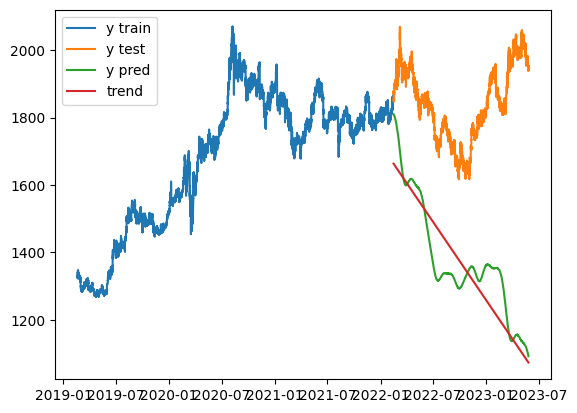

In [36]:
import matplotlib.pyplot as plt
plt.plot(X['ds'] ,X['y'], label = "y train")
plt.plot(Y['ds'] ,Y['y'], label = 'y test')

plt.plot(y_pred['ds'] ,y_pred['yhat'], label = 'y pred')


plt.plot(y_pred['ds']  ,y_pred["trend"], label = "trend")
plt.legend()
plt.show()

In [16]:
error = mape(Y['y'], y_pred['yhat'])
print(error)

54.70549666653619



# XGBOOST

In [50]:
import seaborn as sns 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
# plt.style.use('fivethirtyeight')

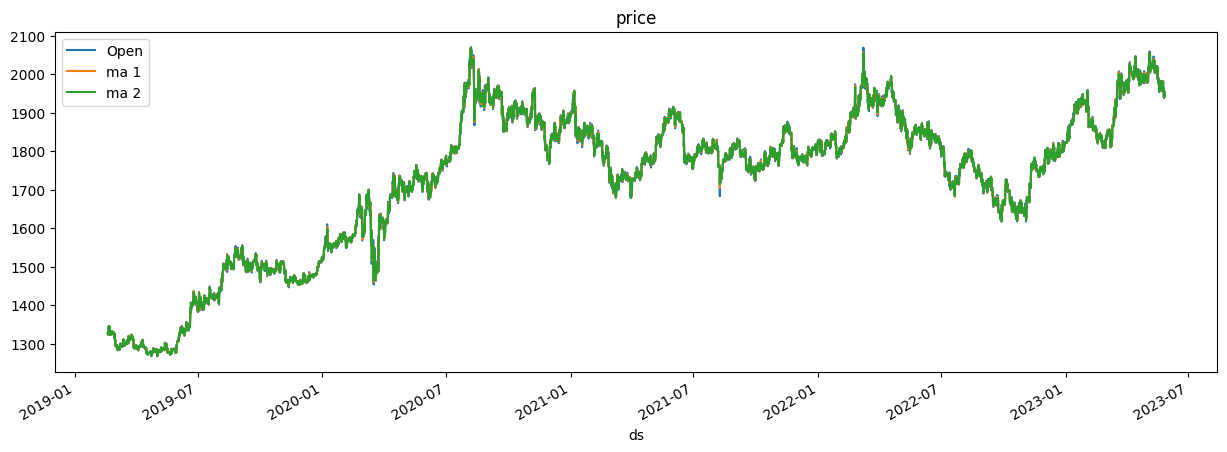

In [51]:
df [['Open', 'ma 1', 'ma 2']] .plot(style='-',
    figsize= (15,5),
    color = color_pal,
    title= "price"      
        )
plt.show()

In [52]:

# Prepare data for training
from sklearn.model_selection import train_test_split


x = df.index
y = df['Open']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle= False)


In [54]:
X_train, X_test, y_train, y_test

(DatetimeIndex(['2019-02-18 17:15:00', '2019-02-18 17:30:00',
                '2019-02-18 17:45:00', '2019-02-18 18:00:00',
                '2019-02-18 18:15:00', '2019-02-18 18:30:00',
                '2019-02-18 18:45:00', '2019-02-18 19:00:00',
                '2019-02-18 19:15:00', '2019-02-18 19:30:00',
                ...
                '2022-07-20 02:45:00', '2022-07-20 03:00:00',
                '2022-07-20 03:15:00', '2022-07-20 03:30:00',
                '2022-07-20 03:45:00', '2022-07-20 04:00:00',
                '2022-07-20 04:15:00', '2022-07-20 04:30:00',
                '2022-07-20 04:45:00', '2022-07-20 05:00:00'],
               dtype='datetime64[ns]', name='ds', length=80034, freq=None),
 DatetimeIndex(['2022-07-20 05:15:00', '2022-07-20 05:30:00',
                '2022-07-20 05:45:00', '2022-07-20 06:00:00',
                '2022-07-20 06:15:00', '2022-07-20 06:30:00',
                '2022-07-20 06:45:00', '2022-07-20 07:00:00',
                '2022-07-20 07:15:0

In [53]:
reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

# Train the model
reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=100)

ValueError: Please reshape the input data into 2-dimensional matrix.

In [37]:
y_pred = reg.predict(X_test)

In [38]:
err = mape(y_test, y_pred)
print(err)

0.6563630079954658


In [45]:
y_test

ds
2022-06-13 23:15:00    1822.62
2022-09-07 14:00:00    1702.68
2019-03-11 08:45:00    1298.07
2021-12-14 19:15:00    1773.86
2020-06-02 07:30:00    1737.80
                        ...   
2023-01-24 01:45:00    1932.03
2022-12-14 03:00:00    1811.08
2021-03-17 09:45:00    1734.27
2020-09-14 19:15:00    1957.04
2019-08-06 20:45:00    1472.89
Name: Open, Length: 20009, dtype: float64

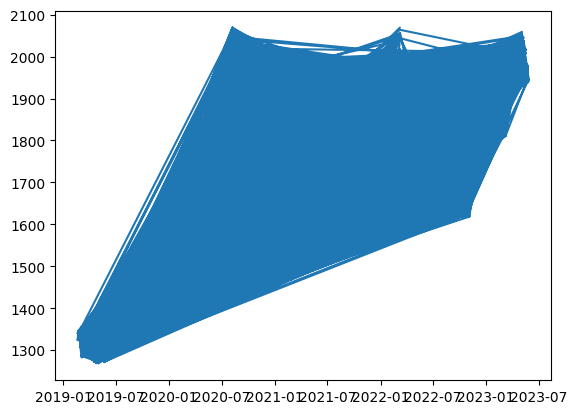

In [47]:
# plt.plot(X_train, y_train)
plt.plot(y_test)
# plt.scatter( y_test[:100].index,y_pred[:100] )
plt.show()

# The END